In [1]:
import os
import pandas as pd
import re
import ngrams
import fasttext
import numpy as np
import math

In [2]:
#将属性名按照标点，分割成token
def snake_case_split(line):
    #Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
    #r表示非转义的原始字符串
    #由于正则表达式通常都包含反斜杠，所以你最好使用原始字符串来表示它们。模式元素(如 r'\t'，等价于 '\\t')匹配相应的特殊字符。
    #[...]用来表示一组字符,单独列出：[amk] 匹配 'a'，'m'或'k'
    line_split = re.split(r'[\s_]',line.strip())
    line_split = [line.strip() for line in line_split if len(line.strip())>0]
    return line_split


#将属性按照大写字母，分割成token
#"firstName"分成 ['First', 'Name']
def camel_case_split(str):
    if "a"<=str[0]<="z" :
        strTemp=str[0].upper()+str[1:]
        return re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', strTemp)
    else :
        return re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str)


#将属性名先按照snakeCase拆分，再按照camelCase拆分
#最后按照语料库拆分
def attributeToToken(str):
    tokenList = []
    for snakeToken in snake_case_split(str):
        for camelToken in camel_case_split(snakeToken):
            camelToken = camelToken.lower()
            corpusTokenList = ngrams.segment2(camelToken) [1]
            tokenList = tokenList + corpusTokenList
    return tokenList

In [3]:
class Attribute:
    def __init__(self, attributeName, originateFrom):
        self.attributeName = attributeName
        self.tokenList = attributeToToken(attributeName)
        #属性来自哪张表
        self.originateFrom = originateFrom

In [4]:
class Table:
    def __init__(self, tableName, attributeSet):
        self.tableName = tableName
        self.attributeSet = attributeSet

In [5]:
attributeList = []
#湖中所有的表在这个字典中
tableDict = {}
#getTokenWeight函数用到numOfAttribute
numOfAttribute = 0
for info in os.listdir('/usr/project/TC/example'):
    tableName = info[0:-4]#去掉.csv后缀
    domain = os.path.abspath('/usr/project/TC/example')#获取文件夹的路径
    info = os.path.join(domain,info)#将路径与文件名结合起来就是每个文件的完整路径
    df = pd.read_csv(info)
    attributeSet = {}
    for attributeName in list(df):
        x=Attribute(attributeName, tableName)
        attributeList.append(x)
        numOfAttribute = numOfAttribute+1
        attributeSet[attributeName] = x
    y = Table(tableName, attributeSet)
    tableDict[tableName] = y

In [6]:
for tableName in tableDict:
    print(tableName, tableDict[tableName].attributeSet)

t_ca85e8f9eef5b9d5 {'OBJECTID': <__main__.Attribute object at 0x7efdf7ed08e0>, 'PEDON_ID': <__main__.Attribute object at 0x7efe2b48c550>, 'LAYER_ID': <__main__.Attribute object at 0x7efe2b48c160>, 'U_DEPTH': <__main__.Attribute object at 0x7efe2b429310>, 'L_DEPTH': <__main__.Attribute object at 0x7efe28391130>, 'COLOUR_1': <__main__.Attribute object at 0x7efe283916d0>, 'COLOUR_2': <__main__.Attribute object at 0x7efdf7dfa550>, 'CONSIS_DRY': <__main__.Attribute object at 0x7efdf7dfa0d0>, 'CONSIS_MST': <__main__.Attribute object at 0x7efdf7dfa5b0>, 'CONSIS_PLS': <__main__.Attribute object at 0x7efdf7dfa4c0>, 'CONSIS_WET': <__main__.Attribute object at 0x7efdf7dfa4f0>, 'MOTTLE_FRQ': <__main__.Attribute object at 0x7efdf7dfa220>, 'MOTTLE_SZE': <__main__.Attribute object at 0x7efdf7dfa250>, 'ROOT_FREQ': <__main__.Attribute object at 0x7efdf7dfa3d0>, 'ROOT_LOCTN': <__main__.Attribute object at 0x7efdf7dfa640>, 'ROOT_ORIEN': <__main__.Attribute object at 0x7efdf7dfa670>, 'ROOT_THICK': <__main

In [7]:
print(numOfAttribute)

202


In [8]:
#token的字典，用来记录token出现的次数nt
tokenDict = {}
for x in attributeList:
    for token in x.tokenList:
        if token in tokenDict:
            tokenDict[token] = tokenDict[token] + 1
        else:
            tokenDict[token] = 1
print(tokenDict)

{'objectid': 2, 'pedon': 1, 'id': 17, 'layer': 1, 'u': 1, 'depth': 2, 'l': 1, 'colour': 2, 'consis': 4, 'dry': 1, 'mst': 1, 'pls': 1, 'wet': 1, 'mottle': 2, 'frq': 1, 'sze': 1, 'root': 4, 'freq': 1, 'loc': 2, 'tn': 1, 'orien': 1, 'thick': 1, 's': 8, 'prm': 4, 'grad': 2, 'kind': 2, 'mod': 2, 'size': 2, 'sec': 4, 'salinity': 1, 'effe': 1, 'rv': 1, 'esc': 1, 'reg': 2, 'no': 3, 'variation': 1, 'number': 4, 'service': 3, 'current': 1, 'traffic': 1, 'area': 3, 'lic': 1, 'discs': 2, 'in': 1, 'possession': 1, 'auth': 2, 'granted': 1, 'date': 9, 'exp': 1, 'description': 4, 'op': 2, 'name': 17, 'trading': 1, 'address': 1, 'start': 1, 'point': 2, 'finish': 1, 'via': 1, 'effective': 1, 'received': 1, 'end': 1, 'type': 12, 'other': 1, 'details': 2, 'licence': 1, 'status': 5, 'registration': 1, 'pub': 1, 'text': 1, 'short': 2, 'notice': 1, 'subsidies': 2, 'tao': 1, 'covered': 1, 'by': 1, 'code': 7, 'site': 2, 'identifier': 1, 'hourly': 1, 'count': 3, 'last': 3, 'total': 3, 'updated': 1, 'latest': 4,

In [9]:
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
ft.get_word_vector("hello")

In [9]:
def getTokenWeight(token):
    nt = tokenDict[token]
    return math.log(numOfAttribute/nt)


#归一化向量
def normalize(x):
    return x/np.linalg.norm(x)

#加权平均，并归一化
#通过检验
def tokensToVector(tokenList):
    wordEmbedding = ft.get_word_vector(tokenList[0])
    x = wordEmbedding*getTokenWeight(tokenList[0])
    totalWeight = getTokenWeight(tokenList[0])
    for token in tokenList[1:]:
        wordEmbedding = ft.get_word_vector(token)
        x = x+wordEmbedding*getTokenWeight(token)
        totalWeight = totalWeight + getTokenWeight(token)
    return normalize(x/totalWeight)

In [12]:
attributeEmbeddingList = []
#计算attributeVector
for x in attributeList:
    x.attributeEmbedding = tokensToVector(x.tokenList)
    #points
    attributeEmbeddingList.append(x.attributeEmbedding)

#  将向量列表按行写入文件，每个向量占一行
np.savetxt('attributeEmbeddingList.txt', attributeEmbeddingList)

In [ ]:
print(len(attributeEmbeddingList))
print(len(attributeList))

In [10]:
import numpy as np
loaded_attributeEmbeddingList = np.loadtxt('attributeEmbeddingList.txt')

i = 0
for x in loaded_attributeEmbeddingList:
    attributeList[i].attributeEmbedding = x
    i = i+1

from pyclustering.cluster.gmeans import gmeans

gmeans_instance = gmeans(loaded_attributeEmbeddingList).process()
clusters = gmeans_instance.get_clusters()
print(len(clusters))
print(clusters)

75
[[34, 41, 42, 44, 45, 46, 68, 70, 104, 107, 108, 151, 188], [64, 65, 66, 67, 69, 71, 72, 138], [61], [63], [80], [60, 62, 135, 136, 141], [152, 153, 184, 187, 192], [28, 83, 89, 109, 110, 139, 171, 172, 198], [84], [105], [29, 47, 51, 118, 155, 176, 177], [102], [101], [106], [96], [30, 50, 78, 88, 95], [43], [32], [92, 143, 145, 147, 175, 180, 183], [85], [86], [52], [39], [186], [150], [93], [94], [40], [90], [36, 58, 59, 199], [87], [48, 49, 103, 111, 140], [173], [122, 196], [148, 156, 157, 163, 164], [53], [54], [159, 166, 167, 168, 169, 170], [75, 76, 99, 100], [73, 74, 97, 98], [197], [25, 77, 160, 161, 162, 165], [5, 6], [7, 10, 193, 194], [37, 38, 79, 190, 201], [144, 146, 174, 179, 182, 185], [142], [115], [181], [2], [149], [1], [200], [0, 189], [81], [21, 22, 23, 24], [17, 18, 19, 20], [123], [124], [125], [12, 56, 119, 120], [126, 127, 128, 132, 133, 134], [131], [129], [130], [8], [35, 113, 114, 116], [31], [27], [112], [3, 4, 9, 91, 117], [178], [26, 57, 82, 121], [11

In [11]:
for j in range(0, len(clusters)):
    if len(clusters[j])>1 :
        for i in clusters[j]:
            print(attributeList[i].attributeName)
        print("********************")

Granted_Date
start_point
finish_point
effective_date
received_date
end_date
Hour
Date
DefaultWaitTime
CreationDateTime
ModificationDateTime
Untied amount (Project-level budget)
Amount spent
********************
Latest Day
Latest Week
Latest Month
Latest Year
Day
Month
Year
Fiscal year
********************
Hourly Count
Total Count
TOTAL_FATAL_INJURIES
TOTAL_SERIOUS_INJURIES
Maximum CIDA contribution (project-level)
********************
FSTC percent
IRTC percent
Country/region percent
Sector percent
PERCENT_
********************
Variation Number
NaptanCode
Indicator
RevisionNumber
Modification
Project number
ICT as a tool for development (marker)
Knowledge for development (marker)
MODIFIER
********************
Service Number
Service_Type_Other_Details
Service_Type_Description
COLLISION_TYPE
CIDA business delivery model (old)
Organisation type (location, profit/not-for-profit)
Organisation class
********************
Current Traffic Area
Pub_Text
Location
Street
LocalityCentre
************

In [12]:
from scipy import spatial
class Edge:
    def __init__(self, tableNameX, tableNameY):
        self.points = [tableNameX, tableNameY]

class RelatedAttributePair:
    def __init__(self, attributeA, attributeB):
        #成员变量
        self.attributeA = attributeA
        self.attributeB = attributeB
        self.cos_dist = spatial.distance.cosine(attributeA.attributeEmbedding, attributeB.attributeEmbedding)

In [13]:
#相关表对，稀疏图还是稠密图，应该是稀疏图，某表只和同领域的表有边
#稀疏图用邻接链表，邻接链表中的索引是表名
#键是表名，list中是相关表

dataRelationshipGraph={}

for cluster in clusters:
    for i in range(0,len(cluster)-1):
        for j in range(i+1,len(cluster)):
            attributeX = attributeList[cluster[i]]
            attributeY = attributeList[cluster[j]]
            tableNameX = attributeX.originateFrom
            tableNameY = attributeY.originateFrom

            #自己和自己不连边
            if tableNameX == tableNameY:
                continue
            
            #tableNameX连上了tableNameY

            if tableNameX in dataRelationshipGraph:
                #二维dict已经连上了边，添加一个相关属性对
                if tableNameY in dataRelationshipGraph[tableNameX]:
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)
                #二维dict还没连上边，调用Edge的构造函数   
                else:
                    dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)       
            else:
                #第一维dict的值是dict
                dataRelationshipGraph[tableNameX]={}
                dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                x = RelatedAttributePair(attributeX, attributeY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)

            #######################################
            #tableNameY也要连上tableNameX
            #i和j调换后，其余代码不用变
            attributeX = attributeList[cluster[j]]
            attributeY = attributeList[cluster[i]]
            #上面的tableNameY是attributeList[cluster[j]].originateFrom
            #此处的tableNameX是attributeList[cluster[j]].originateFrom
            tableNameX = attributeX.originateFrom
            tableNameY = attributeY.originateFrom

            if tableNameX in dataRelationshipGraph:
                #二维dict已经连上了边，添加一个相关属性对
                if tableNameY in dataRelationshipGraph[tableNameX]:
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)
                #二维dict还没连上边，调用Edge的构造函数   
                else:
                    dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)       
            else:
                #第一维dict的值是dict
                dataRelationshipGraph[tableNameX]={}
                dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                x = RelatedAttributePair(attributeX, attributeY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)
         

In [14]:
#define一个函数:
    #对相关属性对进行排序，距离递增的顺序
    #初始化一个setA用来记录tableA已经匹配的属性，如果要创建一个空集合，你必须用 set() 而不是 {}
    #初始化一个setB用来记录tableB已经匹配的属性
    
    #for 相关属性对 in sorted相关属性对list：
        #如果属性A且属性B尚未匹配成功：
            #属性A和属性B匹配
            #这对属性用来计算表相关度
    
    #计算匹配属性相关度之和
    #计算分母
    #Edge.tableRelateness = 分子/分母



#计算表相关度
def computeTableSim(edge):
    #余弦距离递增
    sortedRelatedAttributePair = sorted(edge.relatedAttributes, key = lambda pair: pair.cos_dist)
    #初始化两个集合用来记录tableX和tableY已经匹配的属性
    matchedAttrDict = {key: set() for key in edge.points}
    #记录分子的每一项
    matchedAttrPairs = []
    #pair的类型是RelatedAttributePair
    for pair in sortedRelatedAttributePair:
        attributeA = pair.attributeA
        attributeB = pair.attributeB
        boolA = attributeA.attributeName in matchedAttrDict[attributeA.originateFrom]
        boolB = attributeB.attributeName in matchedAttrDict[attributeB.originateFrom]
        #属性A未匹配 且 属性B未匹配
        #列表验证过此处的逻辑
        if (not boolA) and (not boolB):
            #属性A所在的表匹配了属性A
            matchedAttrDict[attributeA.originateFrom].add(attributeA.attributeName)
            #属性B所在的表匹配了属性B
            matchedAttrDict[attributeB.originateFrom].add(attributeB.attributeName)
            #属性A和属性B匹配
            matchedAttrPairs.append(pair)

    fenZi = 0
    for matchedPair in matchedAttrPairs:
        cos_sim =  1 - matchedPair.cos_dist
        fenZi = fenZi + cos_sim

    lenT = len(tableDict[edge.points[0]].attributeSet)
            #此时是table对象               #此时是dict  #加len就是表中属性数
    lenS = len(tableDict[edge.points[1]].attributeSet)
    product = lenT * lenS
    fenMu = math.sqrt(product)
    edge.tableSim = fenZi / fenMu

In [17]:
for tableX in dataRelationshipGraph:
    #dict
    relatedTables = dataRelationshipGraph[tableX]
    for tableY in relatedTables:
        #Edge类的对象
        edge = relatedTables[tableY]
        computeTableSim(edge)
        print(edge.tableSim)

0.09412474395408735
0.17318993404433483
0.08728786196859012
0.08192908641930613
0.06530027152344549
0.04656938100250737
0.09412474395408735
0.2123037823864649
0.059378391764067485
0.03586752497012403
0.05944756039174083
0.012266308626070043
0.17318993404433483
0.2123037823864649
0.10758233882057627
0.017287181810605477
0.037448924156819025
0.030837546635308914
0.08728786196859012
0.059378391764067485
0.10758233882057627
0.03346517145783279
0.06727451639942764
0.022615042880757427
0.03586752497012403
0.03346517145783279
0.06530027152344549
0.0743228964663608
0.06056991756993495
0.030837546635308914
0.06727451639942764
0.08192908641930613
0.017287181810605477
0.05944756039174083
0.0743228964663608
0.09868945196762217
0.012266308626070043
0.022615042880757427
0.09868945196762217
0.04656938100250737
0.06056991756993495
0.037448924156819025


In [15]:
a = {'a': '1', 'b': '2', 'c': '3'}
for key in a:
    print(key)

a
b
c


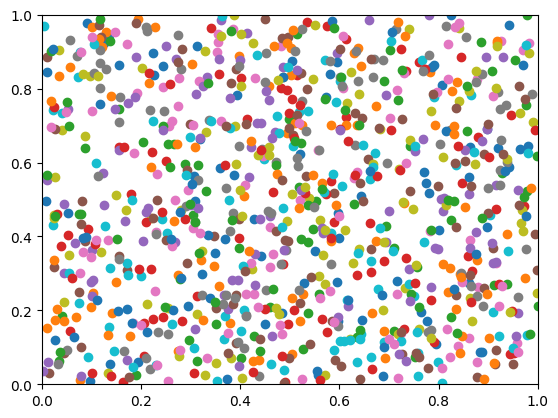

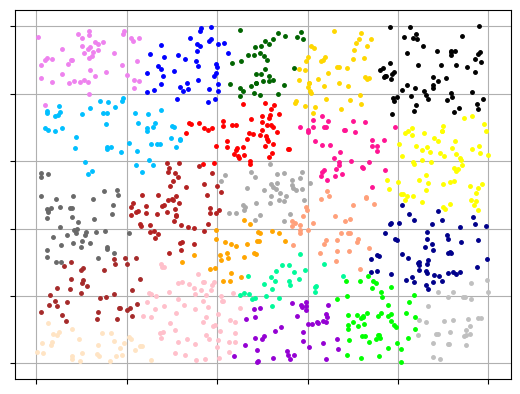

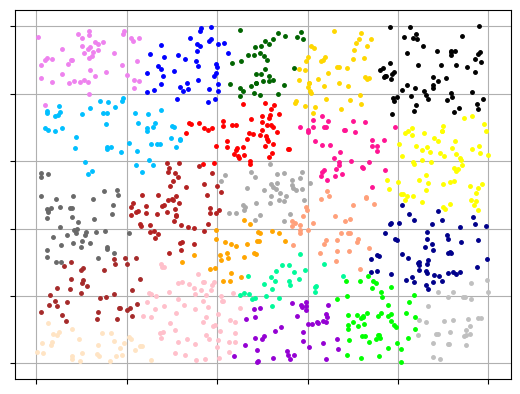

In [10]:
import random
import matplotlib.pyplot as plt
from pyclustering.cluster.gmeans import gmeans

#  存储点的坐标
points = [(random.random(), random.random()) for _ in range(1000)]

#  创建一个新的图形窗口
plt.figure()

# 绘制点
for x, y in points:
    plt.scatter(x, y)

#  设置图形的范围，确保所有点都在视图内
plt.xlim(0,  1)
plt.ylim(0,  1)

#  显示图形
plt.show()

gmeans_instance = gmeans(points).process()
clusters = gmeans_instance.get_clusters()

from pyclustering.cluster import cluster_visualizer


visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, points)
visualizer.show()
